Matematiikassa <i>algoritminen ongelma</i>

Sanotaan, että ongelma on <i>ratkeava</i>, kun on olemassa algoritmi, joka ratkaisee sen polynomiajassa. Polynomiajassa toimivia algoritmeja sanotaan <i>toteutettaviksi</i>.

Tässä kirjoitelmassa tutkitaan kahta eri algoritmia, jotka laskevat kahden luvun suurimman yhteisen tekijän. Vertaillaan niiden aikavaativuutta keskenään.

# Algoritmit

Seuraavat kaksi algoritmia ratkaisevat ongelman $GCD(a,b)$, ne siis laskevat jokaiselle syötteelle $(a,b)$ lukujen $a$ ja $b$ suurimman yhteisen tekijän $syt(a,b)$.

#### Algoritmi 1
Ensimmäisessä algoritmissa vähennetään lukuja $a$ ja $b$ toisistaan vuorotellen niin, että luvut pysyvät ei-negatiivisina. Tällä tavoin päästään pienimpään positiiviseen lukuun $d$, joka saadaan alkuperäisten lukujen $a$ ja $b$ lineaarikombinaationa. Luku $d$ lukujen $a$ ja $b$ suurin yhteinen tekijä. Algoritmi 1 käyttää vain vertailuja ja vähennyslaskuja, jotka voidaan suorittaa $O(max\{n, m\})$ bittioperaatiolla, missä $n$ ja $m$ ovat lukujen binääriesityksien pituudet.

In [1]:
def syt(a, b):
    kierros = 0
    while a > 0 and b > 0:
        if a > b:
            a = a - b
        else:
            b = b - a
        kierros += 1
    return((a, kierros))

Algoritmissa pidetään kirjaa tarvittavien kierrosten määrästä. Jokaisella kierroksella tehdään kolme vertailua ja yksi vähennyslasku, eli yksi kierros on $O(n)$.

#### Algoritmi 2 (Eukleideen algoritmi)
Toinen algoritmi on tavallinen Eukleideen algoritmi, joka on eräs maailman vanhimmista tunnetuista algoritmeista. Algoritmissa lasketaan kahden luvun jakojäänös, jonka laskeminen onnistuu $O(n^2)$ bittioperaatiolla.

In [2]:
def eukl(a, b):
    q = max(a, b)
    r = min(a, b)
    kierros = 0
    while r != 0:
        q, r = r, q % r
        kierros += 1
    return (q, kierros)

Voidaan todistaa, että Eukleideen algoritmissa kierroksia tarvitaan korkeintaan $O(n)$ kappaletta. Joissain tapauksissa vähemmällä ei selviä, esimerkiksi kun $a$ ja $b$ ovat peräkkäiset Fibonaccin luvut.

# Aikavaativuus

Vertaillaan seuraavaksi algoritmien vaatimien kierrosten lukumäärää.

In [22]:
def vertailu(a, b):
    print(f"syt({a},{b}) = {syt(a, b)[0]}")
    print("Alg.| kierrosten lkm")
    print(f" 1  |   {syt(a, b)[1]}")
    print(f" 2  |   {eukl(a, b)[1]} \n")

In [23]:
vertailu(233, 144)
vertailu(233, 233)
vertailu(233, 1)

syt(233,144) = 1
Alg.| kierrosten lkm
 1  |   12
 2  |   11 

syt(233,233) = 233
Alg.| kierrosten lkm
 1  |   1
 2  |   1 

syt(233,1) = 1
Alg.| kierrosten lkm
 1  |   233
 2  |   1 



Peräkkäisten Fibonaccin lukujen sytin laskemisessa algoritmit suoriutuvat suunnilleen yhtä monessa kierroksessa, samoin kun lasketaan luvun syt itsensä kanssa, mutta $syt(a, 1)$ laskemiseen algoritmilla 1 menee $a$ kierrosta, eli $O(2^n)$ laskutoimitusta ja vertailua! Laskutoimitukset ovat tosin erityisen edullisia: ykkösen vähetäminen luvusta $a$ tapahtuu ajassa $O(1)$, mutta silti algoritmi on kelvoton huonoimmassa tapauksessa.

On hieman huolimatonta vertailla algoritmeja aritmeettisten operaatioiden suhteen, kun algoritmien käyttämät operaatiot ovat keskenään eri kompleksisuusluokkaa, mutta huomataan, että tässä tapauksessa sillä ei ole merkitystä. Huomautettakoon, että algoritmi 1 toimii Eukleideen algoritmia paremmin peräkkäisillä Fibonaccin luvuilla, koska kierrokset on aikakompleksisuusmielessä halvempaa kertaluokkaa.

# Visualisointi
Havainnollistetaan molempien algoritmien suorituskykyä eri tapauksissa piirtämällä kuvia.

In [5]:
%matplotlib inline

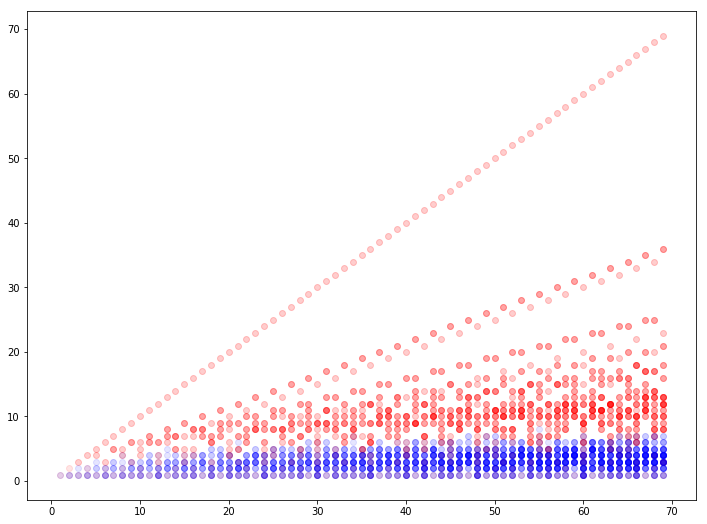

In [48]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(figsize=(12, 9))

n = 70

for b in range(1, n):
    x = range(b, n)
    z1 = [syt(a, b)[1] for a in x]
    z2 = [eukl(a, b)[1] for a in x]
    axs.scatter(x, z1, c = 'r', alpha = 0.1)
    axs.scatter(x, z2, c = 'b', alpha = 0.1)

plt.show()

Yllä on kuvaaja kierrosten lukumäärästä syötteen $a$ funktiona. Kuvaajan selkeyden vuoksi oletetaan, että $a \geq b$. Punaisella on merkitty algoritmin 1 tarvitsemien kierrosten lukumäärä. Algoritmin 1 kuviossa on muutamia haaroja, joissa kierroksia vaaditaan todella paljon, muun muassa $syt(a,1)$, $syt(a,2)$ ja $syt(a, a-1)$. Eukleideen algoritmin vaatimat kierrokset (sinisellä) taas kasvavat todella hillitysti. Kuvaajastakin havaitaan, että pahimmissa tapauksissa algoritmi 1 tarvitsee $a$ kierrosta.

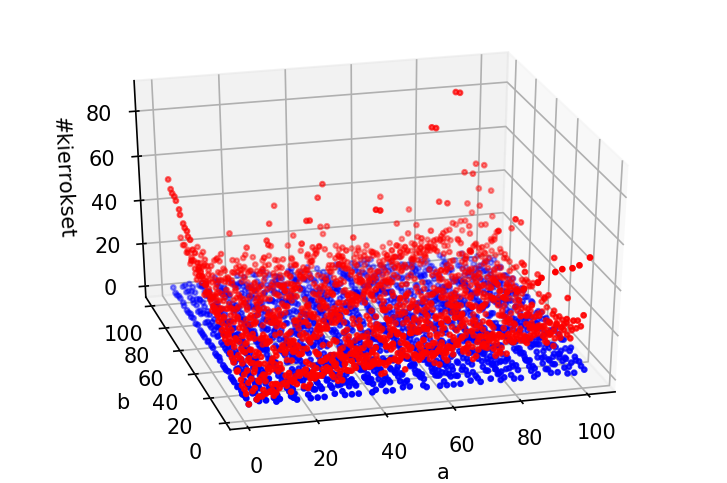

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')

points = 40
n = 100

r = np.random.randint(0, 2, points)
s = np.rint(np.linspace(1, n, points))
s = s + r

x = []
y = []
z1 = []
z2 = []

for a in s:
    for b in s:
        x.append(a)
        y.append(b)
        z1.append(syt(a,b)[1])
        z2.append(eukl(a,b)[1])

ax.scatter(y, x, z1, c='r', marker='.')
ax.scatter(y, x, z2, c='b', marker='.')

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('#kierrokset')

ax.view_init(30, -105)
plt.show()

Yllä kolmiulotteinen kuvaaja. Aiempi kaksiulotteinen kuvaaja on tämä kuva sivusta katsottuna. Pisteitä on otettu harvasti ja vähän satunnaisesti, ettei kuva menisi aivan tukkoon pisteistä, ja tasavälein otetut pisteet käyttäytyvät liian säännöllisesti.

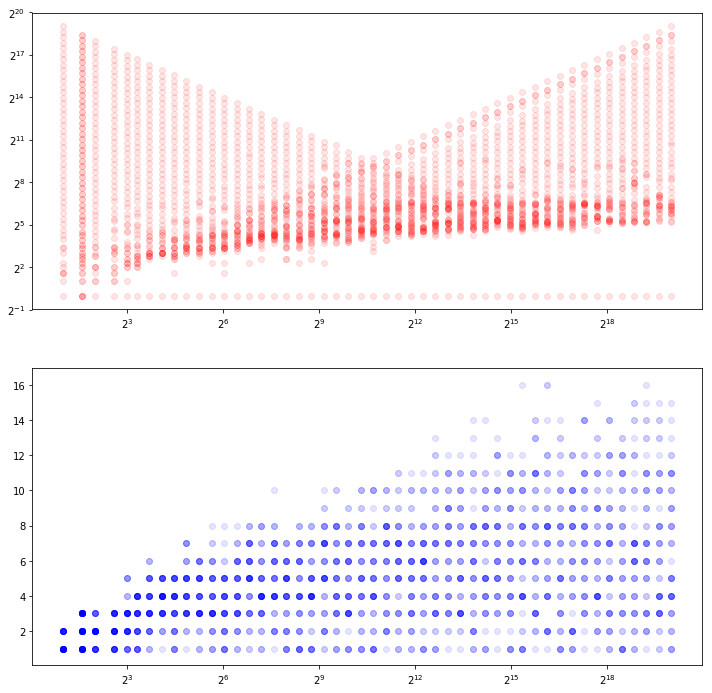

In [39]:
fig, axs = plt.subplots(2,figsize=(12, 12))

n = 20

x = np.rint(np.logspace(1,n,50, base = 2))

for a in x:
    z1 = [syt(a, b)[1] for b in x]
    z2 = [eukl(a, b)[1] for b in x]
    axs[0].scatter(x, z1, c='r', alpha=0.1)
    axs[1].scatter(x, z2, c='b', alpha=0.1)

axs[0].loglog(basex=2, basey=2)
axs[1].semilogx(basex=2)

plt.show()

Yllä vielä kuvattuna logaritmisella asteikolla molempien algoritmien tarvitsemien kierrosten määrää. Ensimmäisessä kuvaajassa molemmat akselit ovat logaritmisia, alemmassa y-akseli on lineaarinen. Algoritmissa 1 pahimmat tapaukset tarvitsevat siis eksponentiaalisen määrän kierroksia. Siksi ei ole mitään väliä sillä, miten monta bittioperaatiota yhden kierroksen suorittaminen vie. Luvun $1$ vähentäminen luvusta $a$ on vakioaikainen operaatio, mutta algoritmi muuttuu kelvottomaksi, jos vakioaikaisia operaatioita täytyy tehdä eksponentiaalinen määrä.

Eukleideen algoritmi taas näyttää kuvasta katsottuna suoriutuvan lineaarisessa määrässä kierroksia kaikissa tapauksissa, ja koska jakolasku voidaan tehdä ajassa $O(n^2)$, algoritmi kuuluu luokkaan $O(n^3)$, ja siten suurimman yhteisen tekijän laskeminen ongelmana kuuluu luokkaan $O(n^3)$. 

# Päätelmät

Voidaan todeta, että ratkaistaville ongelmille on olemassa melko yksinkertaisia ei-toteutettavia algoritmeja. Esimerkiksi voidaan testata, onko luku $a$ alkuluku kokeilemalla, jakaako mikään luku $i < \sqrt{a}$ luvun $a$. Tämä algoritmi selvästi antaa oikean vastauksen, mutta testejä pitää tehdä eksponentiaalinen määrä luvun $a$ pituuden suhteen. On kuitenkin keksitty verrattomasti hienostuneempia deterministisiä algoritmeja, jotka ratkaisevat saman ongelman polynomiajassa, tosin hitaasti, ja todennäköisyysalgoritmeja, jotka toimivat kohtuullisessa ajassa.

Koulussa opetetaan, että "kertolasku on vain yhteenlaskua monta kertaa"!